The data Bank Marketing is related with direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
in order to access if the product (bank term deposit) would be (or not) subscribed. 

Let us build various classifiers and compare their accuracy.

# Data Exploration

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv(r"/kaggle/input/bank-marketing/bank-full.csv")

In [ ]:
data.head()

In [ ]:
data["y"].unique()

In [ ]:
len(data)

In [ ]:
data = data.drop_duplicates(keep="first")
len(data)

No duplicate values!

In [ ]:
data.isnull().sum()

No null values too!

In [ ]:
# Importing the matplotlib library
import matplotlib.pyplot as plt

target_counter = len(data[data["y"]=="no"]),len(data[data["y"]=="yes"])

plt.bar(data["y"].unique(), target_counter,color="pink")# Displaying the bar plot

The data is clearly imbalanced. Hence we will use equal samples of it to train our classifiers. 

Other methods include using SMOTE: SYNTHETIC MINORITY OVER-SAMPLING TECHNIQUE which is a type of data augmentation that synthesizes new samples from existing ones. [link to SMOTE implementation on the same dataset: https://www.kaggle.com/nabamitachakraborty/smote]

# Data Preprocessing

## Taking balanced sample of data 

In [ ]:
target = "y"
sample_size = data[target].value_counts().min()

In [ ]:
balanced_data = data.groupby('y',as_index=False, group_keys=False).apply(lambda x: x.sample(sample_size))
balanced_data = balanced_data.reset_index(drop = True)

import seaborn as sns

sns.countplot(x="y",data=balanced_data)
balanced_data.y.value_counts()

In [ ]:
balanced_data.head()

## Converting object type attributes 

In [ ]:
#list of variables with 2 categories:
bi_list = balanced_data.nunique()[balanced_data.nunique()==2].index.tolist()
print(bi_list)
for col in bi_list:
    balanced_data[col] = balanced_data[col].replace(balanced_data[col].unique().tolist(),[0,1])
balanced_data.head(10)

In [ ]:
#SPLITTING TARGET VALUE:
y = balanced_data.y.reset_index(drop=True)
X = balanced_data.drop(['y'],axis=1,inplace=False).reset_index(drop=True)
print("data:\n",X)
print("target:\n",y)

In [ ]:
X = pd.get_dummies(X, drop_first=False)
X.head(10)

In [ ]:
X.columns

## Train-Test-Split 

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train,X_test,y_train,y_test = X_train.reset_index(drop=True),X_test.reset_index(drop=True),y_train.reset_index(drop=True),y_test.reset_index(drop=True)

## Feature scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler

#Scaling columns that have values greater than 1
to_scale = [col for col in X.columns if X[col].max()>1]

sc = StandardScaler()

scaled_train = sc.fit_transform(X_train[to_scale])
scaled_train = pd.DataFrame(scaled_train,columns=to_scale)

scaled_test = sc.fit_transform(X_test[to_scale])
scaled_test = pd.DataFrame(scaled_test,columns=to_scale)

#Replace the original columns with the scaled ones
for col in scaled_train:
    X_train[col] = scaled_train[col]
    X_test[col] = scaled_test[col]

## Dimensionality Reduction(Optional) 

In [ ]:
"""
PCA
Often creating dummy variables increases the number of features significantly, slowing down our model training. 
In such cases, we can apply Principle Component Analysis to remove less significant features."""

print("Initial dimension:\nTrain data:{}\nTest data:{}".format(X_train.shape,X_test.shape))
print()

from sklearn.decomposition import PCA

pca = PCA(n_components="mle",svd_solver="full")

X_train = pca.fit_transform(X_train)
print("Explained variance ratio for train data:\n",pca.explained_variance_ratio_)
print()
X_test = pca.fit_transform(X_test)
print("Explained variance ratio for test data:\n",pca.explained_variance_ratio_)
print()
print("Dimension after PCA:\nTrain data:{}\nTest data:{}".format(X_train.shape,X_test.shape))



## Modeling 

We now compare different types of classifiers:

* Logistic Regression
* Perceptron.
* Naive Bayes.
* Decision Tree.
* Logistic Regression.
* K-Nearest Neighbor.
* Artificial Neural Networks/Deep Learning.
* Support Vector Machine.

Then there are the ensemble methods: 

* Random Forest
* Bagging
* AdaBoost


### Logistic Regression 

Since our target variable has two unique (binary) values, we can apply logistic regression to build a classifier on our data.
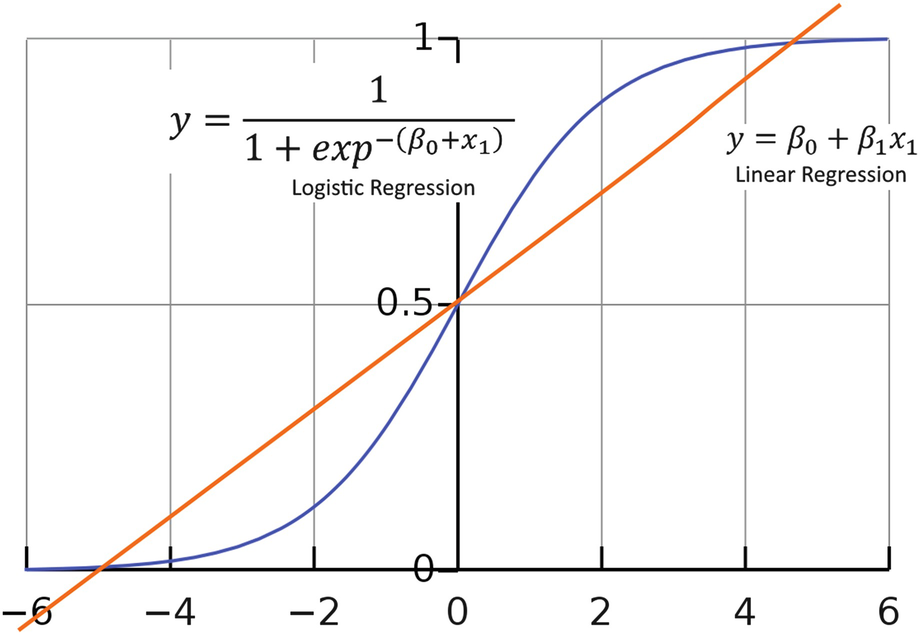

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
print("Train accuracy=",lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# classification report
print(classification_report(y_test, y_pred_lr, digits=3, zero_division = 1))
print("ACCURACY:",accuracy_score(y_test, y_pred_lr))

### Perceptron

A perceptron is nothing but a single layered neural network.

![image.png](https://miro.medium.com/max/1838/1*uzm-62Wq3J1JF1HwTMY4mg.png)

In [ ]:
from sklearn.linear_model import Perceptron
pr = Perceptron(tol=1e-4, random_state=0)
pr.fit(X_train,y_train)
y_pred_pr = pr.predict(X_test)
print("Train accuracy:",pr.score(X_train,y_train))


In [ ]:
# classification report
print(classification_report(y_test, y_pred_pr, digits=3, zero_division = 1))
print("ACCURACY:",accuracy_score(y_test, y_pred_pr))